<h1> 2059797_sayardhakal

# Regresssion Task

Regression is a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

The  equation of best fit line for multiple linear regression is given by the following mathematical expression <br>
                                <b> &emsp;y = b1x1 + b2x2 + … + bnxn + c.<br> </b>
                                 &emsp;where x1,x2 represent independent variables and y the dependent variables and b the bias terms.

  

# Implementation of Regression

This is a bank.csv files which have 17 columns. The column have their name as  age, job, marital, education, default, balance, housing, loan, contact, day , month, duration, campaign, pdays, previous, poutcome and y. Below is the implementation of the multiple linear regression on a dataset used to predict the balance based on the given features.The follwoing regression model has been created with the use of the optimization algorithm gradient descent with the learning rate of 0.0001 over 10000 iterations.I have choosed balance as a target and remaining all as a features(age, job,  marital, education, default, housing, loan, contact, day , month, duration, campaign, pdays, previous, poutcome and y).<br>

I have scatter the plot for actual value and predicted value of y and also plot the graph for iterated costs function.

In [4]:
#importing some important python libraries 
import pandas as pd
import numpy as np

In [5]:
#importing the data in pandas 
#for this we have to make a variable and use read_csv format


data = pd.read_csv('C://Users/user/Desktop/AI coursework/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#checking for null value
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**from the above code, we have conclude that there is no any null value in the following respective columns.**

In [7]:
#Encoding the categorical data columns  into a nominal data
#For this we have to import LabelEncoder from sklearn.preprocessing

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df = data
df.age = le.fit_transform(df.age)
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.contact = le.fit_transform(df.contact)
df.month = le.fit_transform(df.month)
df.duration = le.fit_transform(df.duration)
df.pdays = le.fit_transform(df.pdays)
df.poutcome = le.fit_transform(df.poutcome)
df.y  = le.fit_transform(df.y)


#Testing the encoded columns

df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3,0
1,26,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3,0
2,15,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3,0
3,29,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3,0
4,15,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3,0


# **Data Visualization**

Text(0, 0.5, 'balance')

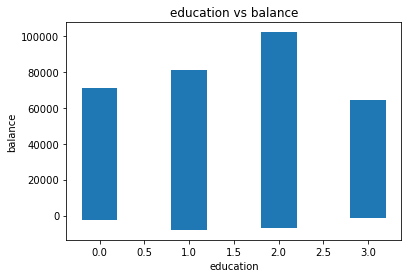

In [8]:
import matplotlib.pyplot as plt
plt.bar(df['education'], df['balance'], width=0.4)
plt.title('education vs balance')
plt.xlabel('education')
plt.ylabel('balance')

**From above bar graph, we see that balance is mostly influence by eduction which have 2.0 .It has the balance of 100000.Tertiary eduction have more balance**

Text(0, 0.5, 'balance')

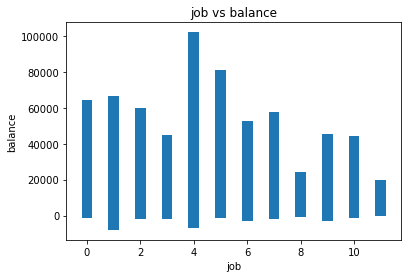

In [9]:
import matplotlib.pyplot as plt
plt.bar(df['job'], df['balance'], width=0.4)
plt.title('job vs balance')
plt.xlabel('job')
plt.ylabel('balance')

**From the above graph of job vs balance , we can cleary see that the balance is mostly influence by management that the other independent jobs.**

Text(0, 0.5, 'balance')

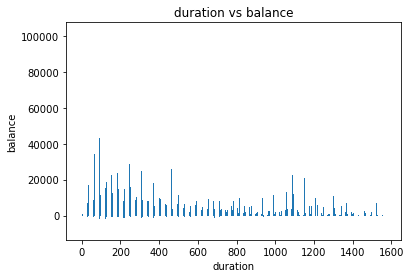

In [10]:
import matplotlib.pyplot as plt
plt.bar(df['duration'], df['balance'], width=0.4)
plt.title('duration vs balance')
plt.xlabel('duration')
plt.ylabel('balance')

**From the above graph of duration vs balance, we can clearly see that the duration which have the value 261 has the high balance then the remaining duration**

In [10]:
#Now defining independent variables and dependent variables
#For this datasets I have choosed balance as dependent variable and remaining all an independent varaible

dataSet = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration','campaign', 'pdays', 'previous', 'poutcome','y', 'balance']]

X = dataSet.iloc[: , :16]
Y = dataSet.iloc[: , 16]

#For testing we have used head in order to display only 5 rows
print(X.head())
print(Y.head())

   age  job  marital  education  default  housing  loan  contact  day  month  \
0   40    4        1          2        0        1     0        2    5      8   
1   26    9        2          1        0        1     0        2    5      8   
2   15    2        1          1        0        1     1        2    5      8   
3   29    1        1          3        0        1     0        2    5      8   
4   15   11        2          3        0        0     0        2    5      8   

   duration  campaign  pdays  previous  poutcome  y  
0       261         1      0         0         3  0  
1       151         1      0         0         3  0  
2        76         1      0         0         3  0  
3        92         1      0         0         3  0  
4       198         1      0         0         3  0  
0    2143
1      29
2       2
3    1506
4       1
Name: balance, dtype: int64


In [11]:
#Then we have to preprocessing the independent variables

n = len(X.columns)
for i in range (0,n+1):
    X.iloc[:, :i]= X.iloc[:, :i]/np.max(X.iloc[:, :i]) 
    
# after this ,checking the normalized values
print(X.head())

        age       job  marital  education  default  housing  loan  contact  \
0  0.526316  0.363636      0.5   0.666667      0.0      1.0   0.0      1.0   
1  0.342105  0.818182      1.0   0.333333      0.0      1.0   0.0      1.0   
2  0.197368  0.181818      0.5   0.333333      0.0      1.0   1.0      1.0   
3  0.381579  0.090909      0.5   1.000000      0.0      1.0   0.0      1.0   
4  0.197368  1.000000      1.0   1.000000      0.0      0.0   0.0      1.0   

       day     month  duration  campaign  pdays  previous  poutcome    y  
0  0.16129  0.727273  0.166031  0.015873    0.0       0.0       1.0  0.0  
1  0.16129  0.727273  0.096056  0.015873    0.0       0.0       1.0  0.0  
2  0.16129  0.727273  0.048346  0.015873    0.0       0.0       1.0  0.0  
3  0.16129  0.727273  0.058524  0.015873    0.0       0.0       1.0  0.0  
4  0.16129  0.727273  0.125954  0.015873    0.0       0.0       1.0  0.0  


In [12]:
#Now  we are adding a coulmn for a bais term
#The Bias term is a parameter that allows models to represent patterns that do not pass through the origin

dataSet = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)

In [13]:
#Initializing the theta variables
theta = np.array([0]*n)

In [14]:
#After all above steps , we have to make a function to calculate the value theta*X

def hypothesis(theta,X):
    return theta*X

The below function evaluates accuracy of the model by calculating the Root Mean Square Errors <b>(RMSE)</b> between the actual and predicted values.RMSE has been used over MSE for evaluation as the dataset doesnot contain outliers. 

In [15]:
s = len(dataSet)
# making a function called ComputeCost for computing the Cost Function.

def ComputeCost(X,y,theta):
    y1= hypothesis(theta,X)
    y1=np.sum(y1,axis=1)
    add= (np.sum(y1-y)**2/(2*s)) 
    return np.sqrt(add) # This is called RMSE

In [16]:
#Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function.
#defining gradient descent function.

def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations . It is an array[]
    k = 0
    while k < i:
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, n):
            theta[c] = theta[c] - alpha*(sum((y1-y)*(X.iloc[:,c])/n))
        j = ComputeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [17]:
J,j,theta = gradientDescent(X, Y,theta,0.0001,10000)

In [18]:
#Now calculating the predicted values

y_pred = hypothesis(theta, X)
y_pred= np.sum(y_pred, axis=1)

In [19]:
#checking the accuracy of the predictive model.
#we are importing linearRegression in order to fit the X,Y
#Also, we have imported r2_score which helps in resulting the accuracy.
# 1st we made a varaible name model where the fited(X,Y) stored
#finally for the accuracy value of predicted model we print the model.score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression().fit(X,Y)
print(model.score(X,Y))

0.03205094472250136


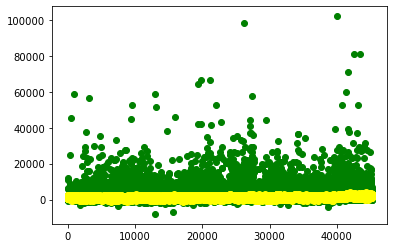

In [20]:
#For the easy visualization of the predicted values and actual values we have plotted the scatter plot for predicted and actual values of y.
#for plot we import matplotlib.pyplot

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0,s)),y= Y,color='green')    
plt.scatter(x=list(range(0,s)), y=y_pred, color='yellow')
plt.show()

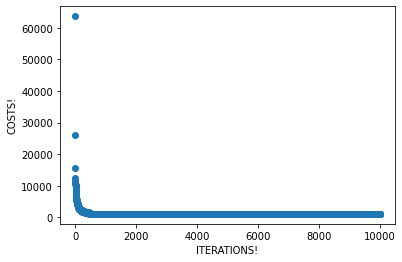

In [21]:
#Aslo we have been plotting the graph for iterated cost functions.
plt.figure()
plt.scatter(x=list(range(0,10000)), y=J)
plt.ylabel('COSTS!')
plt.xlabel('ITERATIONS!')
plt.show()

From the above graph , we can conclude that the RMSE erros between the predicted values and actual values  are going in a uniformly variation at the start of some iterations and after some iteration they are spilted. 